In [32]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

I'm interested in looking at a dataset of Durham, NC bike crashes. When do most crashes happen -- weekdays, or weekends?

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

In [39]:
crash = pd.read_csv('../data/crash.csv', sep=';', encoding='latin1', parse_dates=['Crash_Date'], dayfirst=True, index_col='Crash_Date')
crash[:5]

,FID,OBJECTID,AmbulanceR,BikeAge_Gr,Bike_Age,Bike_Alc_D,Bike_Dir,Bike_Injur,Bike_Pos,Bike_Race,Bike_Sex,City,County,CrashAlcoh,CrashDay,Crash_Grp,Crash_Hour,Crash_Loc,Crash_Mont,Crash_Time,Crash_Type,Crash_Ty_1,Crash_Year,Crsh_Sevri,Developmen,DrvrAge_Gr,Drvr_Age,Drvr_Alc_D,Drvr_EstSp,Drvr_Injur,Drvr_Race,Drvr_Sex,Drvr_VehTy,ExcsSpdInd,Hit_Run,Light_Cond,Locality,Num_Lanes,Num_Units,Rd_Charact,Rd_Class,Rd_Conditi,Rd_Config,Rd_Defects,Rd_Feature,Rd_Surface,Region,Rural_Urba,Speed_Limi,Traff_Cntr,Weather,Workzone_I,Location
Crash_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-23,987,988,No,25-29,26,No,With Traffic,B: Evident Injury,Travel Lane,White,Female,Durham,Durham,No,1/1/07,Bicyclist Failed to Yield - Signalized Interse...,15,Intersection,1/12/01,0001-01-01T10:10:58-04:56,Bicyclist Ride Through - Signalized Intersection,NaN,2012,B: Evident Injury,Residential,25-29,26,No,31-35 mph,O: No Injury,Black,Female,Passenger Car,No,No,Daylight,Urban (>70% Developed),3 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,"36.00026, -78.9077"
2012-10-12,960,961,Yes,15-Nov,12,No,Facing Traffic,K: Killed,Travel Lane,Black,Female,Durham,Durham,No,NaN,Loss of Control / Turning Error,15,Intersection,1/12/01,0001-01-01T10:12:58-04:56,Bicyclist Turning Error - Left Turn,NaN,2012,K: Killed,Residential,50-59,59,No,41-45 mph,O: No Injury,White,Male,Pickup,No,No,Daylight,Urban (>70% Developed),3 lanes,2,Straight - Hillcrest,NC Route,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,40 - 45 MPH,Stop Sign,Cloudy,No,"35.91434, -78.961"
2012-02-12,941,942,Yes,30-39,36,No,With Traffic,C: Possible Injury,Bike Lane / Paved Shoulder,White,Male,None - Rural Crash,Durham,No,1/1/07,Loss of Control / Turning Error,16,Non-Intersection,1/12/01,0001-01-01T11:25:58-04:56,"Motorist Lost Control - Oversteering, Improper...",NaN,2012,C: Possible Injury,"Farms, Woods, Pastures",70,70,No,41-45 mph,O: No Injury,White,Male,Pickup,No,No,Daylight,Rural (<30% Developed),2 lanes,2,Straight - Grade,NC Route,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Rural,50 - 55 MPH,"Double Yellow Line, No Passing Zone",Clear,No,"35.87333, -78.9484"
2012-11-27,914,915,Yes,20-24,23,No,With Traffic,B: Evident Injury,Travel Lane,Black,Male,Durham,Durham,No,1/1/02,Motorist Failed to Yield - Sign-Controlled Int...,22,Intersection,1/11/01,0001-01-01T17:42:58-04:56,Motorist Drive Out - Sign-Controlled Intersection,NaN,2012,B: Evident Injury,Residential,40-49,48,No,0-5 mph,O: No Injury,White,Male,Passenger Car,No,No,Dark - Roadway Not Lighted,Urban (>70% Developed),2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop Sign,Clear,No,"35.89034, -78.9433"
2012-11-21,902,903,Yes,40-49,46,No,Facing Traffic,C: Possible Injury,Travel Lane,Black,Male,Durham,Durham,No,1/1/03,Crossing Paths - Other Circumstances,0,Intersection,1/11/01,0000-12-31T19:48:58-04:56,Signalized Intersection - Other /,NaN,2012,C: Possible Injury,Residential,40-49,48,No,6-10 mph,O: No Injury,Black,Female,Passenger Car,No,No,Daylight,Urban (>70% Developed),3 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,"36.01774, -78.9363"


Next up, we're just going to look only at crashes in Durham, NC, where I live. 

So we're going to create a dataframe with just Durham County crashes in it.

In [86]:
durham_crash = crash[crash['County'] == "Durham"].copy()
durham_crash = durham_crash[['County']].copy()
durham_crash[:3]

#crash_hour = crash[['Crash_Hour']].copy()
#crash_hour[:3]

#crash_durham['Bike_Injur'][:5]

#durham_crash[['Bike_Injur', 'Speed_Limi', 'Drvr_Injur']][:5]

#durham_crash_injur = durham_crash['Bike_Injur'].value_counts(), ['Drvr_Injur'].value_counts()
#durham_bike_injur = durham_crash['Bike_Injur'].value_counts()
#durham_drv_injur = durham_crash['Drvr_Injur'].value_counts()
#durham_drv_injur.plot(kind='bar')
#durham_crash.plot(durham_crash['Bike_Injur', 'Drvr_Injur'])
#durham_crash_injur.plot(kind='bar')
#(durham_drv_injur / durham_bike_injur.astype(float)).plot(kind='bar')

,County
Crash_Date,
2012-12-23,Durham
2012-10-12,Durham
2012-02-12,Durham


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [79]:
durham_crash.index

DatetimeIndex(['2012-12-23', '2012-10-12', '2012-02-12', '2012-11-27', '2012-11-21', '2012-11-18', '2012-10-29', '2012-10-23', '2012-10-20', '2012-10-18', 
               ...
               '2007-02-04', '2007-03-30', '2007-03-30', '2007-03-27', '2007-03-24', '2007-03-23', '2007-03-14', '2007-10-03', '2007-06-01', '2007-02-01'], dtype='datetime64[ns]', name=u'Crash_Date', length=253, freq=None, tz=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [80]:
durham_crash.index.day

array([23, 12, 12, 27, 21, 18, 29, 23, 20, 18, 10, 30, 25, 23, 22, 19, 19,
        9,  9,  9,  9, 29, 24, 19, 16, 15,  8,  8, 25, 15, 15, 30, 28,  6,
       20, 20, 16, 16, 13, 13,  4, 29, 28, 23, 20, 18, 26,  2,  2, 19,  1,
       11, 27, 10, 10, 14,  9, 29, 28, 26, 26, 22, 17,  8, 28, 19,  7, 30,
       27, 15, 15,  6,  6, 26, 24, 22,  5,  5,  5,  5, 29, 29, 27, 14,  4,
       24, 24, 24, 15, 15,  2,  1, 25, 29, 13, 22, 10, 25, 20, 18, 13,  9,
       27, 20, 17, 13,  8, 28, 23, 22,  7,  7,  7,  7, 29, 28, 23, 21, 20,
        6,  6, 25, 15,  5, 30, 18,  4, 21, 17, 17, 28, 25, 18, 12, 12, 12,
       21, 11, 30, 10, 10, 28, 23,  9,  9,  9,  9, 30, 26,  8,  8,  8, 27,
       22, 19,  7,  7, 23, 15, 15,  6, 25, 22, 13,  5,  4,  3, 13, 24, 23,
       22,  1, 14, 12, 12, 14, 11, 11, 11, 11, 29, 17, 30, 24, 15,  9, 30,
       17,  8,  8, 18, 15, 14,  7, 29, 24, 18,  6,  6, 30, 14,  5,  5, 24,
        4,  4, 18, 19,  2,  2, 27, 31, 30, 10, 10, 10, 10, 10, 26, 20, 17,
        9, 29, 25, 20, 17

We actually want the weekday, though:

In [81]:
durham_crash.index.weekday

array([6, 4, 6, 1, 2, 6, 0, 1, 5, 3, 5, 6, 1, 6, 5, 2, 2, 6, 1, 6, 0, 2, 4,
       6, 3, 2, 1, 3, 2, 6, 6, 5, 3, 3, 6, 4, 0, 0, 4, 4, 5, 3, 2, 4, 1, 6,
       6, 3, 3, 3, 0, 1, 3, 6, 1, 2, 5, 0, 6, 4, 4, 0, 2, 1, 3, 1, 5, 3, 0,
       2, 2, 3, 6, 3, 1, 6, 2, 2, 4, 3, 4, 4, 2, 3, 0, 3, 3, 3, 1, 1, 2, 3,
       5, 0, 5, 4, 1, 5, 0, 5, 0, 5, 4, 4, 1, 4, 0, 2, 4, 3, 2, 6, 6, 3, 1,
       0, 2, 0, 6, 4, 1, 1, 5, 1, 4, 6, 3, 6, 2, 2, 6, 0, 0, 0, 6, 6, 5, 3,
       4, 0, 6, 0, 2, 3, 3, 0, 4, 6, 2, 5, 2, 6, 0, 2, 6, 1, 5, 1, 0, 0, 1,
       0, 4, 2, 0, 5, 1, 4, 5, 4, 3, 1, 6, 4, 1, 4, 2, 6, 1, 0, 2, 4, 1, 2,
       0, 2, 5, 6, 5, 1, 4, 1, 0, 3, 6, 1, 2, 3, 3, 4, 2, 5, 5, 3, 1, 1, 1,
       1, 0, 4, 1, 2, 1, 4, 1, 5, 5, 5, 2, 3, 0, 3, 2, 5, 0, 4, 3, 0, 6, 0,
       4, 0, 4, 4, 2, 2, 1, 1, 2, 3, 5, 1, 6, 6, 4, 4, 1, 5, 4, 2, 2, 4, 3], dtype=int32)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [82]:
durham_crash.loc[:,'weekday'] = durham_crash.index.weekday
durham_crash[:7]

,County,weekday
Crash_Date,,
2012-12-23,Durham,6
2012-10-12,Durham,4
2012-02-12,Durham,6
2012-11-27,Durham,1
2012-11-21,Durham,2
2012-11-18,Durham,6
2012-10-29,Durham,0


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [83]:
weekday_counts = durham_crash.groupby('weekday').aggregate('count')
weekday_counts

,County
weekday,
0,35
1,41
2,39
3,36
4,38
5,28
6,36


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [84]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,County
Monday,35
Tuesday,41
Wednesday,39
Thursday,36
Friday,38
Saturday,28
Sunday,36


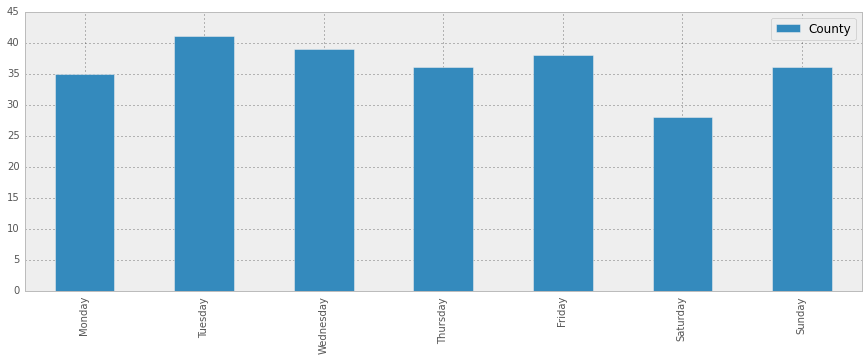

In [85]:
weekday_counts.plot(kind='bar')

So it looks like Durham cyclists get hit fairly evenly on most days of the week.

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

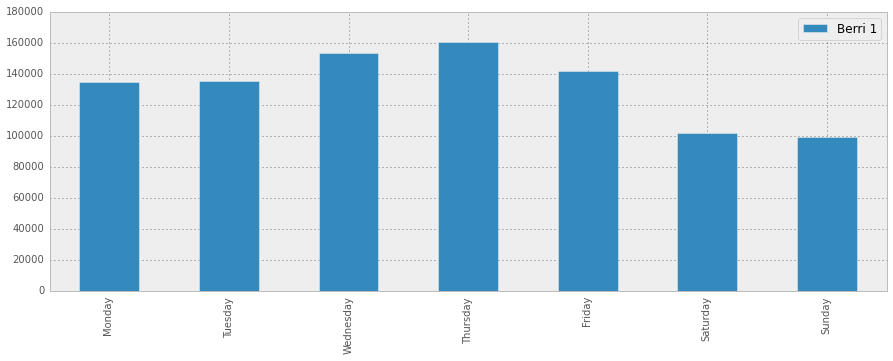

In [24]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')